In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def a0(f):
    return (1/np.pi)*quad(lambda x: f(x)/np.sqrt(2), -np.pi, np.pi)[0]

def a(f, n):
    return (1/np.pi)*quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]

def b(f, n):
    return (1/np.pi)*quad(lambda x: f(x)*np.sin(n*x), -np.pi, np.pi)[0]

In [3]:
def coeffs(f, N=0):
    
    l = [a0(f)]
    if N > 0:
        for n in range(1, N + 1):
            l.append([a(f, n), b(f, n)])
    return l
    
def series(x, coeffs):
    
    s = coeffs[0]/np.sqrt(2)
    
    if len(coeffs) > 1:
        for n in range(1, len(coeffs)):
            s += coeffs[n][0]*np.cos(n*x) + coeffs[n][1]*np.sin(n*x)
    
    return s

In [4]:
# Creación función discontinua en 0
def disc_f(x):
    
    if x < 0:
        return (x + np.pi)/np.pi
    
    return (1./2.) - x/(2.*np.pi)
    
disc_f_vec = np.vectorize(disc_f)



# Función continua

f = lambda x: x

# Función continua periódica

g = lambda x: x**2 - np.pi**2

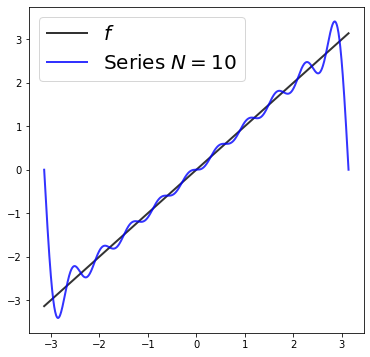

In [16]:
#%matplotlib

N = 10

t = np.linspace(-np.pi, np.pi, num=1000)


coeffs_f = coeffs(f, N=N) # Cambiar esto dependiendo de la función a utilizar

svec = np.vectorize(lambda x: series(x, coeffs_f))


plt.figure(figsize=(6, 6))
# plt.plot(t, disc_f_vec(t), label='$f$', lw=2, color='black', alpha=0.8
plt.plot(t, f(t), label='$f$', lw=2, color='black', alpha=0.8)
plt.plot(t, svec(t), label=f'Series $N={N}$', lw=2, color='blue', alpha=0.8)

#plt.vlines(0, 0, 3/4, color='red', ls='--', lw=3)
#plt.scatter(0, 3/4, s=100, c='r')

plt.legend(loc='best', fontsize=20)

plt.ion()